In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_auc_score, roc_curve
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#from imblearn.ensemble import BalancedRandomForestClassifier

df = pd.read_csv('index.csv')

df.head()

df.shape

X = df.iloc[:,1:]
y = df.iloc[:, 0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print(X_train.shape)
print(X_test.shape)

(800, 20)
(200, 20)


In [28]:
#gb = GradientBoostingClassifier()
svc = SVC(probability=True)
lr = LogisticRegression() 
#balancedRF = BalancedRandomForestClassifier(random_state=42)
# Oversample using SMOTE
#smote = SMOTE(random_state=42)
rf = RandomForestClassifier()
# Train XGBoost with class weights
xgbb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
)
#rf_smote = RandomForestClassifier()
#xgbb_smote = xgb.XGBClassifier(
    #objective='binary:logistic',
    #eval_metric='logloss',
    #use_label_encoder=False,
#)

In [29]:
lr.fit(X_train,y_train)
svc.fit(X_train,y_train)
#balancedRF.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgbb.fit(X_train, y_train)

#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
#rf_smote.fit(X_train_smote, y_train_smote)
#xgbb_smote.fit(X_train_smote, y_train_smote)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

[[ 28  39]
 [ 18 115]]
              precision    recall  f1-score   support

           0       0.61      0.42      0.50        67
           1       0.75      0.86      0.80       133

    accuracy                           0.71       200
   macro avg       0.68      0.64      0.65       200
weighted avg       0.70      0.71      0.70       200



c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[ 33  34]
 [ 15 118]]
              precision    recall  f1-score   support

           0       0.69      0.49      0.57        67
           1       0.78      0.89      0.83       133

    accuracy                           0.76       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.75      0.76      0.74       200



[[  5  62]
 [  5 128]]
              precision    recall  f1-score   support

           0       0.50      0.07      0.13        67
           1       0.67      0.96      0.79       133

    accuracy                           0.67       200
   macro avg       0.59      0.52      0.46       200
weighted avg       0.62      0.67      0.57       200



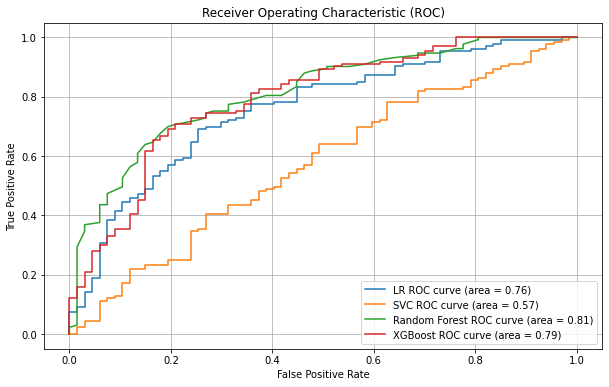

In [31]:
y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_svc = svc.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_xgb = xgbb.predict_proba(X_test)[:, 1]
#y_prob_brf = balancedRF.predict_proba(X_test)[:, 1]
#y_prob_xgb_smote = xgbb_smote.predict_proba(X_test)[:, 1]
#y_prob_rf = rf_smote.predict_proba(X_test)[:, 1]

# Plot ROC Curve for LR
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='LR ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_lr))
# Plot ROC Curve for SVC
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc)
plt.plot(fpr_svc, tpr_svc, label='SVC ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_svc))
# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_rf))
# Plot ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_xgb))
# Plot ROC Curve for BalancedRF
#fpr_brf, tpr_brf, _ = roc_curve(y_test, y_prob_brf)
#plt.plot(fpr_brf, tpr_brf, label='BalancedRF ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_brf))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_test,y_pred_lr)
# Evaluate the model
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)
# Evaluate the model
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

#gb.fit(X_train,y_train)
#y_pred_gb = gb.predict(X_test)
#accuracy_score(y_test,y_pred_gb)
# Evaluate the model
#print(confusion_matrix(y_test, y_pred_gb))
#print(classification_report(y_test, y_pred_gb))

In [ ]:
# Number of trees in random forest
n_estimators = [100, 120]

# Number of features to consider at every split
max_features = [0.8,0.85]

# Maximum number of levels in tree
max_depth = [2,None]

# Number of samples
max_samples = [0.5]

# 108 diff random forest train

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }

rf_grid_rf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf_grid_rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

rf_grid.fit(X_train,y_train)